# Compare neighbourhoods

In [2]:
library(SingleCellExperiment)
library(miloR)
library(DelayedArray)
library(Matrix)
library(ggraph)
library(igraph)
library(viridis)
library(RColorBrewer)
source("../data-in/rabbit/load_rabbit.R")
source("../scrabbitr/R/plot_utils.R") #temp

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

## Load data

In [2]:
# Load data
r_data <- loadRabbitData()
r_data

class: SingleCellExperiment 
dim: 30725 146133 
metadata(0):
assays(2): counts logcounts
rownames(30725): ENSOCUG00000014251 ENSOCUG00000005054 ...
  ENSG00000175602 ENSG00000172324
rowData names(1): V1
colnames(146133): cell_1 cell_2 ... cell_172994 cell_172995
colData names(14): cell barcode ... sizeFactor celltype
reducedDimNames(3): UMAP TSNE PCA
altExpNames(0):

In [3]:
reducedDim(r_data,"PCA") <- as.matrix(reducedDim(r_data,"PCA"))

In [25]:
m_data <- readRDS("../data-in/mouse/integrated_sce.rds")
m_data


class: SingleCellExperiment 
dim: 23972 430339 
metadata(0):
assays(2): counts logcounts
rownames(23972): ENSMUSG00000001138 ENSMUSG00000001143 ...
  ENSMUSG00000108929 ENSMUSG00000109022
rowData names(0):
colnames(430339): cell_1 cell_2 ... ext_cell_351871 ext_cell_351872
colData names(0):
reducedDimNames(0):
altExpNames(0):

In [26]:
m_pcs <- readRDS("../data-in/mouse/integrated_corrected_pcs.rds")
reducedDim(m_data,"PCA") <- as.matrix(m_pcs)

In [27]:
m_meta <- read.table("../data-in/mouse/meta.tsv",sep="\t")
m_data$celltype <- m_meta$celltype.clustering

In [28]:
m_meta2 <- readRDS("../data-in/mouse/integrated_metadata.rds")
reducedDim(m_data,"UMAP") <- m_meta2[,c("BBKNN_UMAP1","BBKNN_UMAP2")]

In [28]:
orthologs <- read.table("../data-in/orthologs.tsv",sep="\t")
orthologs[1:5,]

ref                query             
ENSOCUG00000000006 ENSOCUG00000000006 ENSMUSG00000026102
ENSOCUG00000000007 ENSOCUG00000000007 ENSMUSG00000028480
ENSOCUG00000000008 ENSOCUG00000000008 ENSMUSG00000070999
ENSOCUG00000000009 ENSOCUG00000000009 ENSMUSG00000028478
ENSOCUG00000000010 ENSOCUG00000000010 ENSMUSG00000028479

## Compute neighbourhoods

In [4]:
# Compute rabbit neighbourhoods
r_milo <- Milo(r_data)
r_milo <- buildGraph(r_milo, k=30, d=50, reduced.dim="PCA")
r_milo <- makeNhoods(r_milo, prop=0.05, k=30, d=50,refined=T, reduced_dims="PCA")


Constructing kNN graph with k:30

Checking valid object



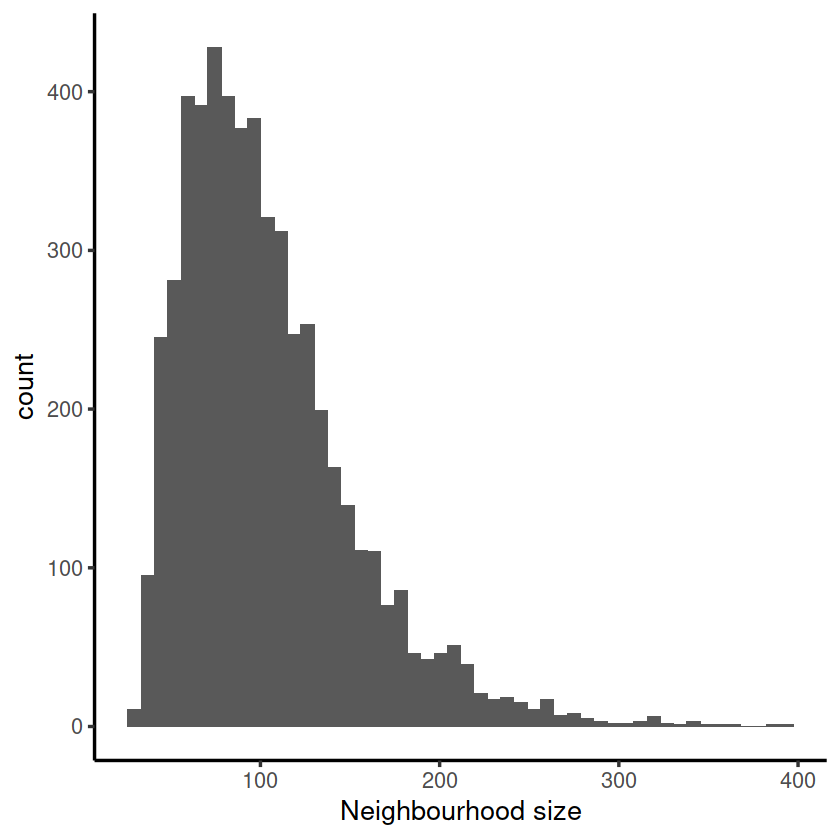

In [38]:
plotNhoodSizeHist(r_milo)

Warning message in plotNhoodGraph(r_milo):
“Coercing layout to matrix format”


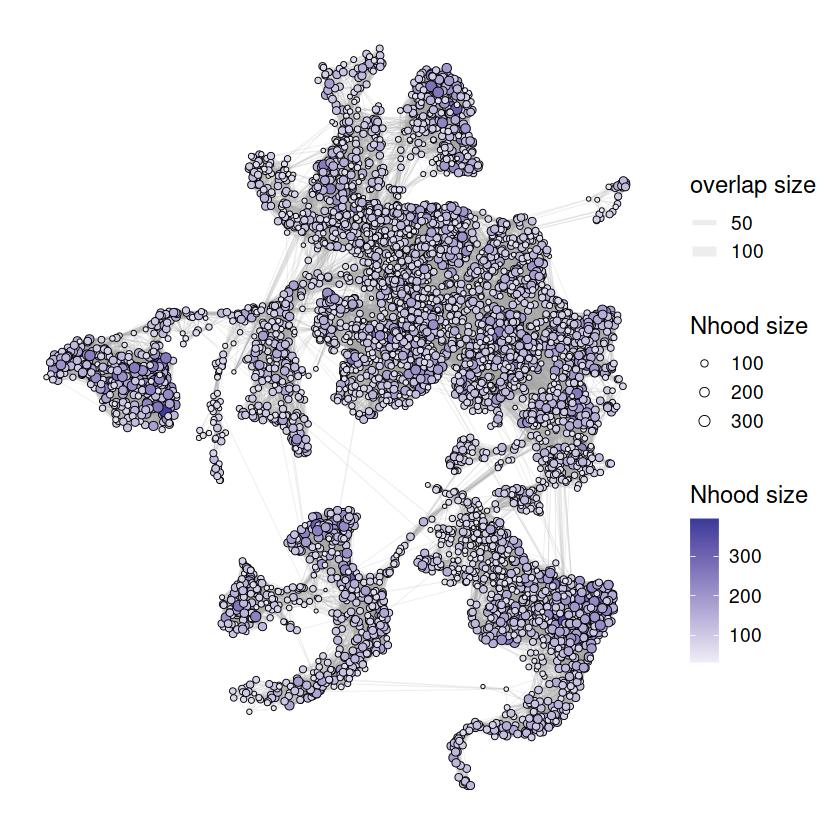

In [5]:
r_milo <- buildNhoodGraph(r_milo)
plotNhoodGraph(r_milo)

In [3]:
r_milo <- readRDS("../data-out/compare_neighbourhoods/r_milo.rds")
#writeMM(r_milo@nhoods,"../data-out/compare_neighbourhoods/r_nhoods.mtx")
#saveRDS(r_milo,"../data-out/compare_neighbourhoods/r_milo.rds")

In [29]:
# Compute mouse neighbourhoods
m_milo <- Milo(m_data)
m_milo <- buildGraph(m_milo, k=30, d=50, reduced.dim="PCA")
m_milo <- makeNhoods(m_milo, prop=0.05, k=30, d=50,refined=T, reduced_dims="PCA")

Constructing kNN graph with k:30

Checking valid object



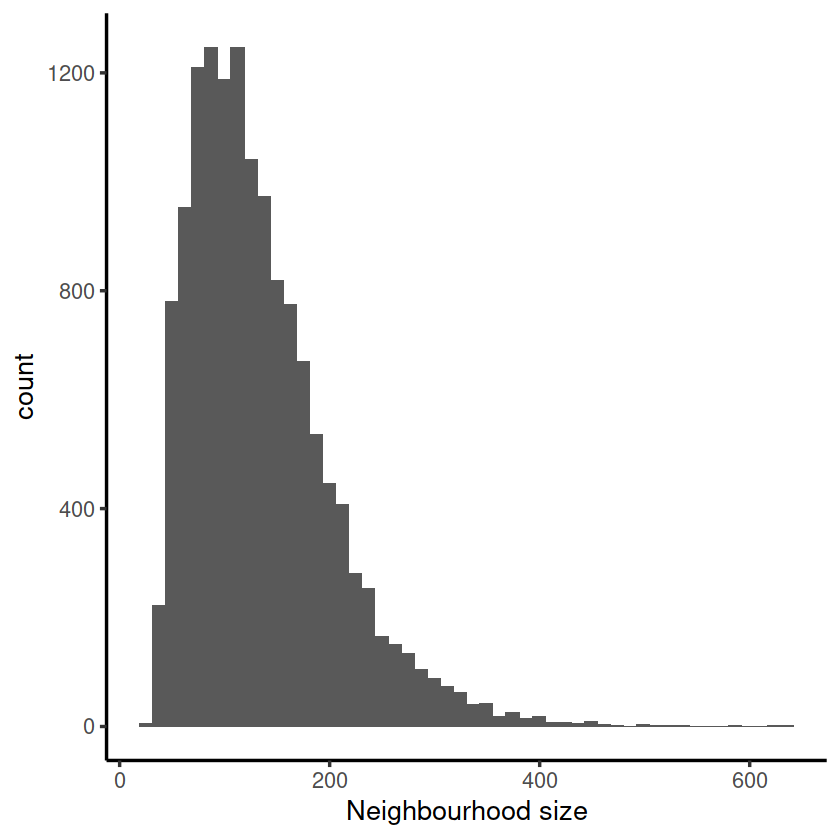

In [30]:
plotNhoodSizeHist(m_milo)

Warning message in plotNhoodGraph(m_milo):
“Coercing layout to matrix format”


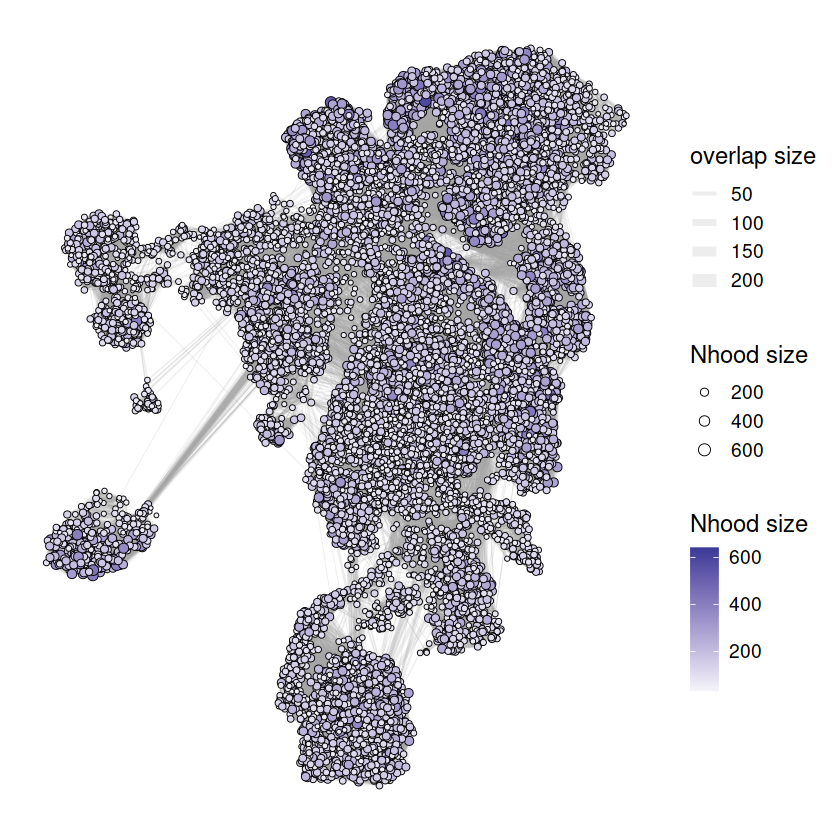

In [33]:
m_milo <- buildNhoodGraph(m_milo)
plotNhoodGraph(m_milo)

In [4]:
m_milo <- readRDS("../data-out/compare_neighbourhoods/m_milo.rds")
#m_nhoods <- readRDS("../data-out/compare_neighbourhoods/m_nhoods.rds")
#saveRDS(m_milo,"../data-out/compare_neighbourhoods/m_milo.rds")
#saveRDS(m_milo@nhoods,"../data-out/compare_neighbourhoods/m_nhoods.rds")
#writeMM(m_milo@nhoods,"../data-out/compare_neighbourhoods/m_nhoods.mtx")

In [40]:
#temp - add force directed graph
r_force <- read.table("../data-out/vis/rabbit/force_atlas.tsv",sep="\t",row.names=1)
reducedDim(r_milo,"FA") <- r_force 


In [41]:
m_force <- read.table("../data-out/vis/mouse/force_atlas.tsv",sep="\t")
reducedDim(m_milo,"FA") <- m_force 

In [56]:
head(reducedDim(m_milo,"PCA")[,1:2])

PC1       PC2      
cell_1 5.9901714 -3.924429
cell_2 5.1415459 -3.791395
cell_5 0.3449326 -5.622904
cell_6 5.2053166 -3.907346
cell_8 5.1587585 -3.919258
cell_9 5.2223928 -3.562871

## Plot similarity

In [5]:
# Load correlation
nhood_sim = fread("../data-out/compare_neighbourhoods/gspec_cor.tsv", sep="\t",data.table=F)
colnames(nhood_sim) <- vertex_attr(nhoodGraph(m_milo))$name
rownames(nhood_sim) <- vertex_attr(nhoodGraph(r_milo))$name

In [6]:
nhood_sim[1:5,1:5]

247238    14403     203858    232515    358972   
57511  0.7701123 0.4276645 0.6810359 0.6825668 0.6590744
104077 0.7368739 0.4418572 0.7697021 0.7815469 0.7464834
30659  0.6408942 0.5090445 0.6700311 0.6305781 0.6520038
19736  0.4544493 0.6724311 0.4549100 0.4362524 0.4562063
73244  0.6944852 0.4734406 0.7321929 0.6960690 0.7256595

In [20]:
dim(nhood_sim)

[1]  5253 14034

In [7]:
# For each nhood get nhood with maximum similarity in other species
r_maxsim <- apply(nhood_sim,1,FUN=which.max)
m_maxsim <- apply(nhood_sim,2,FUN=which.max)

In [8]:
# Reshape nhood similarities 
df_sim = reshape2::melt(as.matrix(nhood_sim))
colnames(df_sim) <- c("r_nhood", "m_nhood", "sim")
df_sim[1:5,]

r_nhood m_nhood sim      
1  57511  247238  0.7701123
2 104077  247238  0.7368739
3  30659  247238  0.6408942
4  19736  247238  0.4544493
5  73244  247238  0.6944852

In [ ]:
# For each nhood extract only its closest nhood in the other species
df_sim <- df_sim[order(df_sim$r_nhood, -df_sim$sim), ] 
r_maxNhoods <- df_sim[!duplicated(df_sim$r_nhood),]

df_sim <- df_sim[order(df_sim$m_nhood, -df_sim$sim), ] 
m_maxNhoods <- df_sim[!duplicated(df_sim$m_nhood),]

df_simFilt <- rbind(r_maxNhoods,m_maxNhoods)
dim(df_simFilt)

[1] 19287     3

In [16]:
# Subset neighbourhoods based on colData observation
subsetNhoods <- function(milo, obs, values) {
    milo_graph <- nhoodGraph(milo)
    nhood_ids <- as.numeric(vertex_attr(milo_graph)$name)
    nhood_obs <- colData(milo)[nhood_ids,obs]
    nhood_filt <- as.character(nhood_ids[nhood_obs %in% values])
    return(nhood_filt)
}

In [23]:
plotNhoodSim <- function(r_milo, m_milo, df_sim, reduced_dim="UMAP", colour_by, r_graph=NULL, m_graph=NULL,
                         offset=c(10,0), reflect.X=FALSE, reflect.Y = FALSE, rotate=NULL, line_alpha=0.05, edge_alpha=0.2,
                        colours=celltype_colours, legend_pos="none") {
    

    # Check if subset graph provided
    if(is.null(r_graph)) {
        r_graph <- nhoodGraph(r_milo)
    }
    
    if(is.null(m_graph)) {
        m_graph <- nhoodGraph(m_milo)
    }
    
    # Extract nhood embedding positions from mouse graph
    r_nhoodIDs <- as.numeric(vertex_attr(r_graph)$name)
    V(r_graph)$colour_by <- colData(r_milo)[r_nhoodIDs, colour_by]
    r_nhoodPos <- data.frame(reducedDim(r_milo, reduced_dim)[r_nhoodIDs,1:2])
    rownames(r_nhoodPos) <- as.character(r_nhoodIDs)
    colnames(r_nhoodPos) <- c("x","y")

    
    # Extract nhood embedding positions from mouse graph
    m_nhoodIDs <- as.numeric(vertex_attr(m_graph)$name)
    V(m_graph)$colour_by <- colData(m_milo)[m_nhoodIDs, colour_by]
    m_nhoodPos <- data.frame(reducedDim(m_milo, reduced_dim)[m_nhoodIDs,1:2])
    rownames(m_nhoodPos) <- as.character(m_nhoodIDs)
    colnames(m_nhoodPos) <- c("x","y")
    
    # TODO: Fix this
    if(!is.null(rotate)) {
        rotate <- rotate*pi/180
        com <- colMeans(m_nhoodPos[,1:2])
        m_nhoodPos = sweep(m_nhoodPos,2,com, "-")
        m_nhoodPos[,1] = m_nhoodPos[,1]*cos(rotate) - m_nhoodPos[,2]*sin(rotate)
        m_nhoodPos[,2] = m_nhoodPos[,1]*sin(rotate) + m_nhoodPos[,2]*cos(rotate)
        m_nhoodPos = sweep(m_nhoodPos,2,com, "+")
    }
    if(reflect.X) { m_nhoodPos[,1] = -m_nhoodPos[,1]}
    if(reflect.Y) {  m_nhoodPos[,2] = -m_nhoodPos[,2]}
    
    
    # Add spacing to offset mouse and rabbit umaps
    m_nhoodPos[,1] <- m_nhoodPos[,1] + offset[1]
    m_nhoodPos[,2] <- m_nhoodPos[,2] + offset[2]
    
    
    r_df <- cbind(r_nhoodPos, V(r_graph)$colour_by)
    colnames(r_df) <- c("x","y","obs")

    m_df <- cbind(m_nhoodPos, V(m_graph)$colour_by)
    colnames(m_df) <- c("x","y","obs")
    
    # Plot nhoods and nhood graphs
    df_plot <- rbind(r_df, m_df)
    p <- ggplot(df_plot,aes(x=x,y=y)) + 
        geom_edge_link0(data=get_edges(format="short")(create_layout(simplify(r_graph),layout=r_nhoodPos)), 
                        edge_colour = "grey66", edge_alpha=edge_alpha) +
        geom_edge_link0(data=get_edges(format="short")(create_layout(simplify(m_graph),layout=m_nhoodPos)), 
                        edge_colour = "grey66", edge_alpha=edge_alpha) +
        geom_point(aes(fill=obs),stroke=0,shape=21) +
        scale_fill_manual(values = celltype_colours[names(celltype_colours) %in% unique(df_plot$obs)], name = "")


    # Filter sim data frame to nhoods within graphs provided
    sim_filt <- df_sim[(df_sim$r_nhood %in%  r_nhoodIDs) & 
                       (df_sim$m_nhood %in% m_nhoodIDs),]
       
    
    # Give each line a unique name
    sim_filt$alignment <- paste0("align_",sim_filt$r_nhood,"_",sim_filt$m_nhood)
    
    # Link rabbit and mouse nhood positions by alignment name
    r_lines <- sim_filt
    r_lines[,c("x","y")] <- r_nhoodPos[as.character(r_lines$r_nhood),]

    m_lines <- sim_filt
    m_lines[, c("x","y")] <- m_nhoodPos[as.character(m_lines$m_nhood),]
    df_lines <- rbind(r_lines, m_lines)
    
    
    # Add similarities lines
    p <- p + geom_line(data=df_lines,aes(x=x,y=y, group=alignment,colour=sim),alpha=line_alpha) +
    scale_color_distiller(palette = "Spectral",limits=c(min(df_sim$sim),max(df_sim$sim)))
    

    # Add theme
    p <- p +  theme_classic(base_size=14) +
    theme(axis.line = element_blank(), axis.text = element_blank(),
      axis.ticks = element_blank(), axis.title = element_blank(),
       legend.position=legend_pos,aspect.ratio=1) 


    return(p)
        
}
    


In [15]:
r_graph <- nhoodGraph(r_milo)
m_graph <- nhoodGraph(m_milo)

### Allantois

In [68]:
celltypes <- c("Allantois","Lateral plate mesoderm", "Epiblast", "Primitive Streak", "Nascent mesoderm",
              "Mesenchyme")

r_nhoodFilt <- subsetNhoods(r_milo, "celltype", celltypes)
m_nhoodFilt <- subsetNhoods(m_milo, "celltype", celltypes)

r_graphFilt <- induced_subgraph(r_graph, r_nhoodFilt)
m_graphFilt <- induced_subgraph(m_graph, m_nhoodFilt)

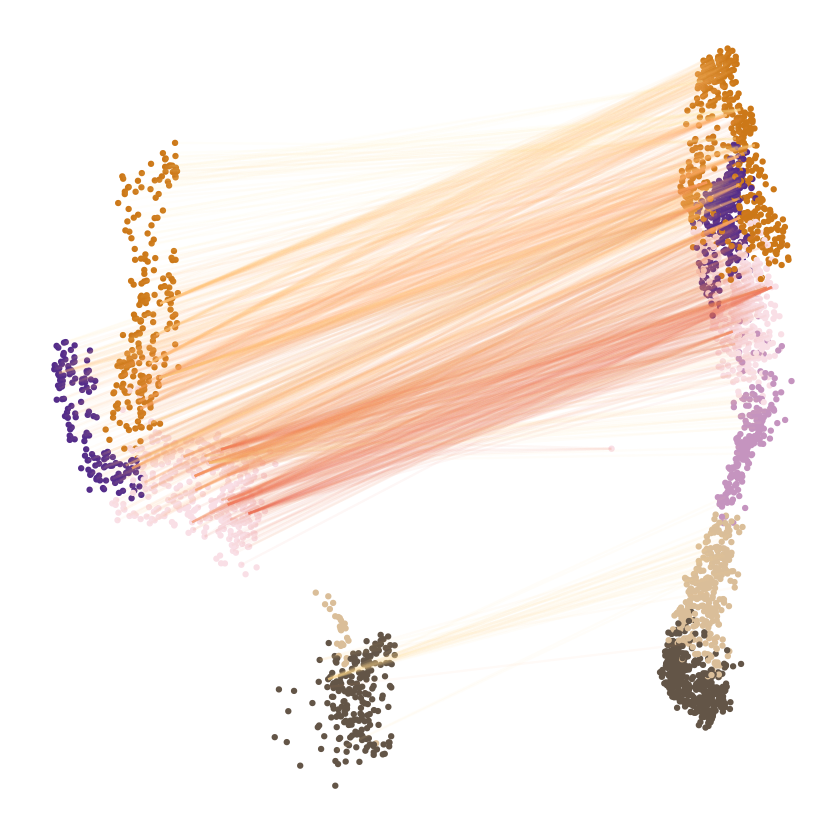

In [69]:
plotNhoodSim(r_milo, m_milo, df_simFilt, reduced_dim="UMAP", "celltype",
             r_graphFilt, m_graphFilt, offset=c(30,30),
             reflect.X=F,reflect.Y=T,line_alpha=0.05,
             edge_alpha=0,normalise_sim=FALSE)

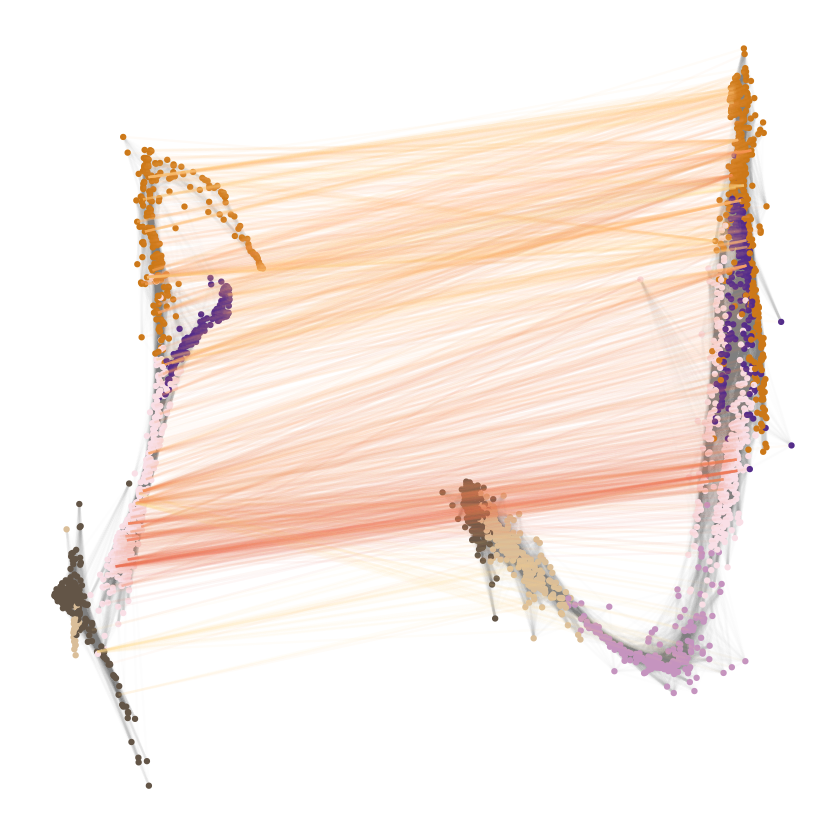

In [70]:
plotNhoodSim(r_milo, m_milo, df_simFilt, reduced_dim="FA", "celltype",
             r_graphFilt, m_graphFilt, offset=c(2000000,-500000),
             reflect.X=F,reflect.Y=T,line_alpha=0.05,
             edge_alpha=0.01,normalise_sim=FALSE)

### Gut

In [177]:
r_nhoodFilt <- subsetNhoods(r_milo, "celltype", c("Visceral endoderm","Hypoblast", "Midgut", "Gut tube","Primitive Streak", "Epiblast"))
m_nhoodFilt <- subsetNhoods(m_milo, "celltype", c("Visceral endoderm","ExE endoderm", "Midgut", "Gut tube","Primitive Streak", "Epiblast","Foregut", "Hindgut"))

r_graphFilt <- induced_subgraph(r_graph, r_nhoodFilt)
m_graphFilt <- induced_subgraph(m_graph, m_nhoodFilt)

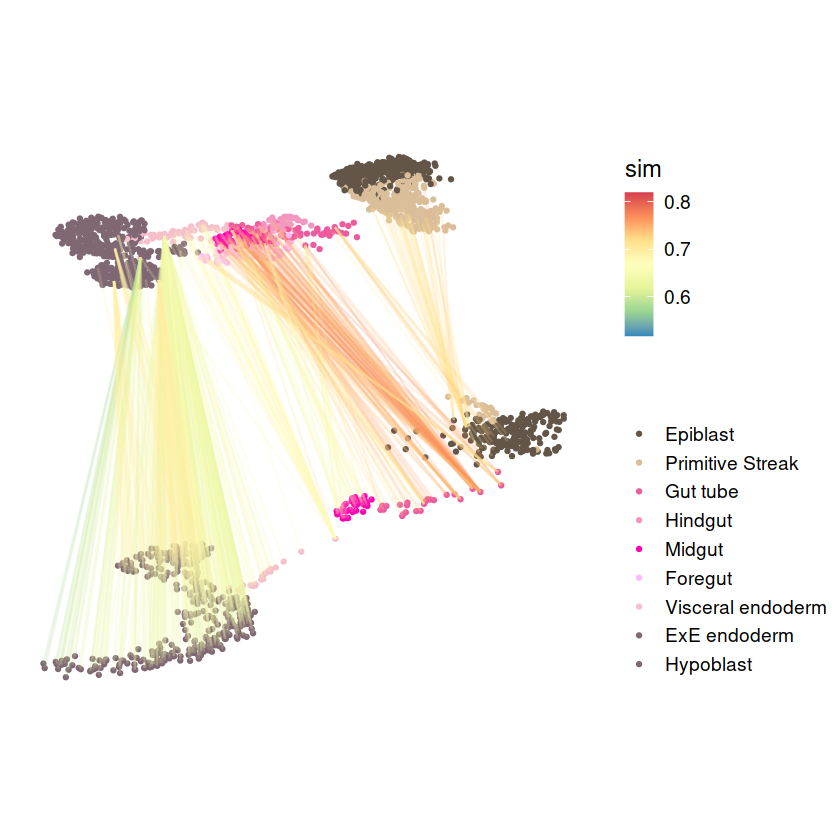

In [178]:
plotNhoodSim(r_milo, m_milo, df_simFilt, "UMAP", "celltype", r_graphFilt, m_graphFilt, 
             offset=c(7,12),line_alpha=0.2,edge_alpha=0, reflect.X=FALSE
            ,legend_pos="right") 

In [179]:
ggsave("../data-test/compare_neighbourhoods/milo_gut_umap.pdf",dpi=300,width=15,units="cm")

Saving 15 x 16.9 cm image



### Mesoderm

In [170]:
celltypes <- c("Sclerotome","Dermomyotome", "Somitic mesoderm", "Anterior somitic tissues",
               "Posterior somitic tissues","Cranial mesoderm","Anterior Primitive Streak",
               "Caudal epiblast","Paraxial mesoderm","Intermediate mesoderm","Epiblast",
               "Primitive Streak","Presomitic mesoderm","NMPs","NMPs/Mesoderm-biased",
              "Caudal mesoderm")

r_nhoodFilt <- subsetNhoods(r_milo, "celltype", celltypes)
m_nhoodFilt <- subsetNhoods(m_milo, "celltype", celltypes)

r_graphFilt <- induced_subgraph(r_graph, r_nhoodFilt)
m_graphFilt <- induced_subgraph(m_graph, m_nhoodFilt)

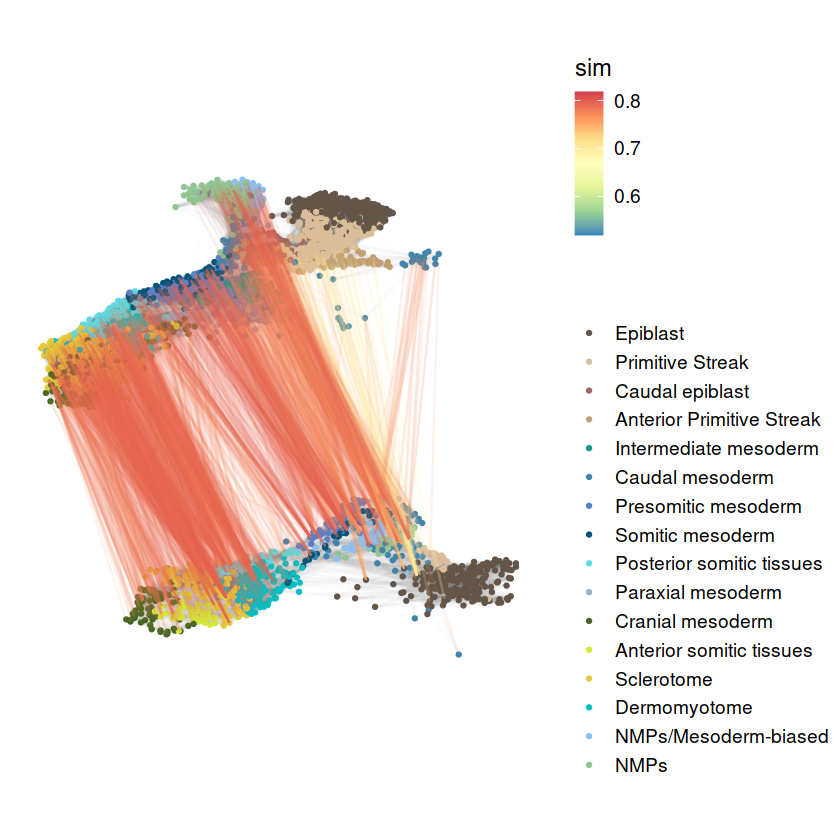

In [171]:
plotNhoodSim(r_milo, m_milo, df_simFilt, "UMAP", "celltype", r_graphFilt, m_graphFilt, 
             offset=c(20,20),reflect.X=TRUE,line_alpha=0.1,edge_alpha=0.01,
            normalise_sim=FALSE,legend_pos="right")

In [172]:
ggsave("../data-test/compare_neighbourhoods/milo_mesoderm_umap_wedges.pdf",dpi=300,width=15,units="cm")

Saving 15 x 16.9 cm image



### Blood

In [148]:
celltypes <- c("Erythroid", "Epiblast","EMP","MEP",
               "Embryo proper endothelium","Nascent mesoderm",
              "Primitive Streak", "Blood progenitors","Haematoendothelial progenitors",
              "Erythroid/Masked","Lateral plate mesoderm")
#"Venous endothelium","YS endothelium","Allantois endothelium","Endocardium"

r_nhoodFilt <- subsetNhoods(r_milo, "celltype", celltypes)
m_nhoodFilt <- subsetNhoods(m_milo, "celltype", celltypes)

r_graphFilt <- induced_subgraph(r_graph, r_nhoodFilt)
m_graphFilt <- induced_subgraph(m_graph, m_nhoodFilt)

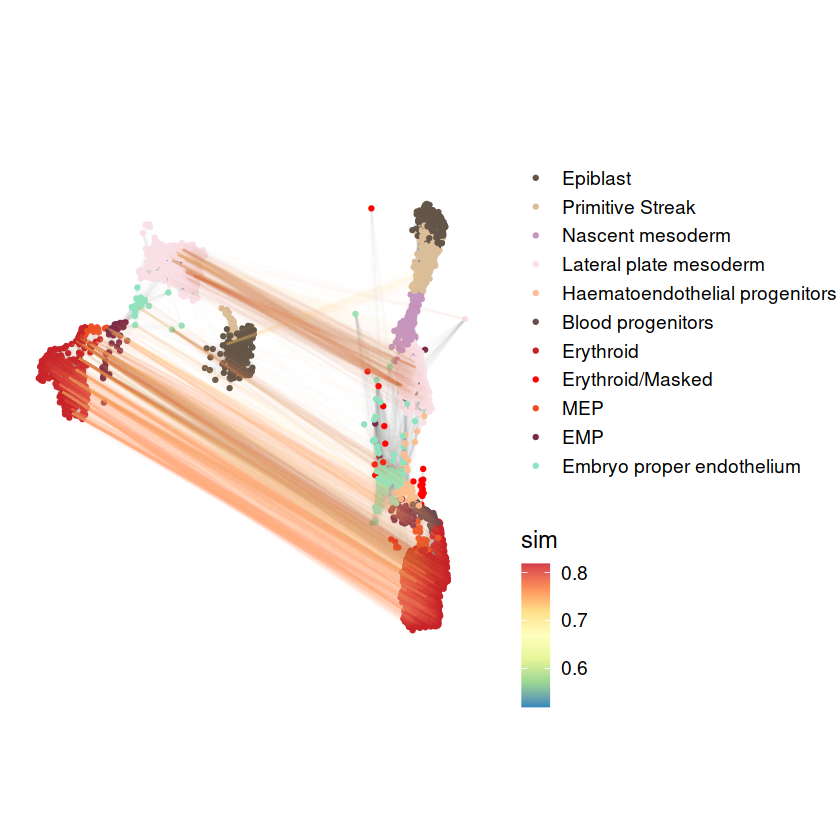

In [149]:
plotNhoodSim(r_milo, m_milo, df_simFilt, "UMAP", "celltype", r_graphFilt, m_graphFilt, 
             offset=c(50,0),reflect.X=TRUE,line_alpha=0.02,edge_alpha=0.01,
            normalise_sim=FALSE,legend_pos="right")

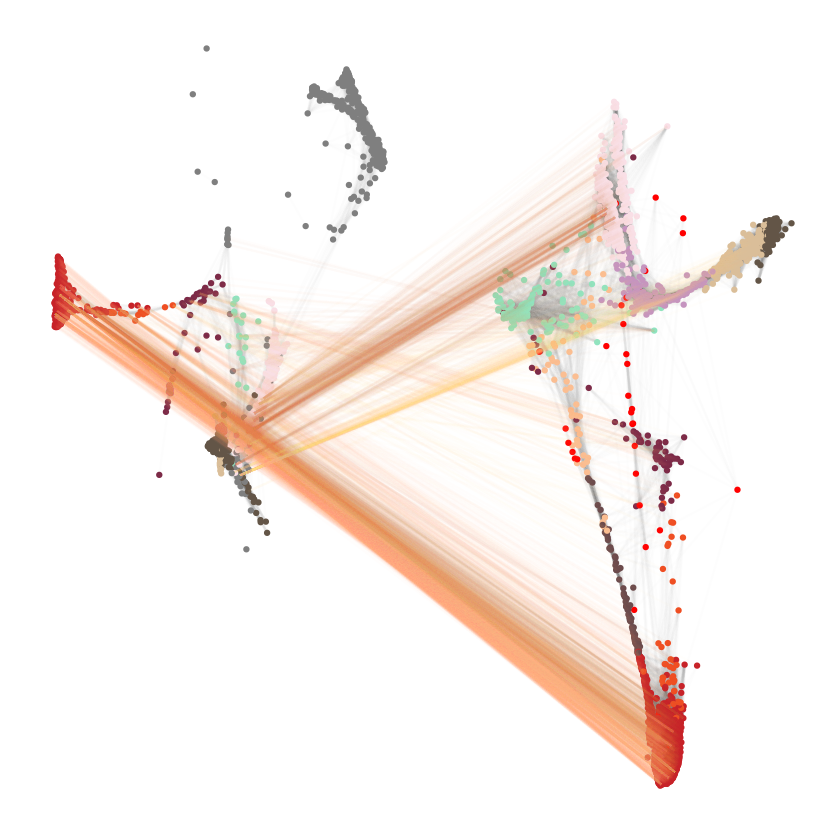

In [81]:
plotNhoodSim(r_milo, m_milo, df_simFilt, "FA", "celltype", r_graphFilt, m_graphFilt, 
             offset=c(2500000,0),reflect.Y=TRUE,reflect.X=TRUE,line_alpha=0.02,edge_alpha=0.01,
            normalise_sim=FALSE,legend_pos="none")

### Cardiomyocytes

In [173]:
celltypes <- c("Anterior cardiopharyngeal progenitors","Cardiomyocytes FHF 1", "Cardiomyocytes FHF 2",
               "Cardiopharyngeal progenitors", "Cardiomyocytes SHF 1","Cardiomyocytes SHF 2",
              "Cardiopharyngeal progenitors FHF", "Cardiopharyngeal progenitors SHF","Epiblast",
              "Nascent mesoderm","Epicardium","Primitive Streak")

r_nhoodFilt <- subsetNhoods(r_milo, "celltype", celltypes)
m_nhoodFilt <- subsetNhoods(m_milo, "celltype", celltypes)

r_graphFilt <- induced_subgraph(r_graph, r_nhoodFilt)
m_graphFilt <- induced_subgraph(m_graph, m_nhoodFilt)

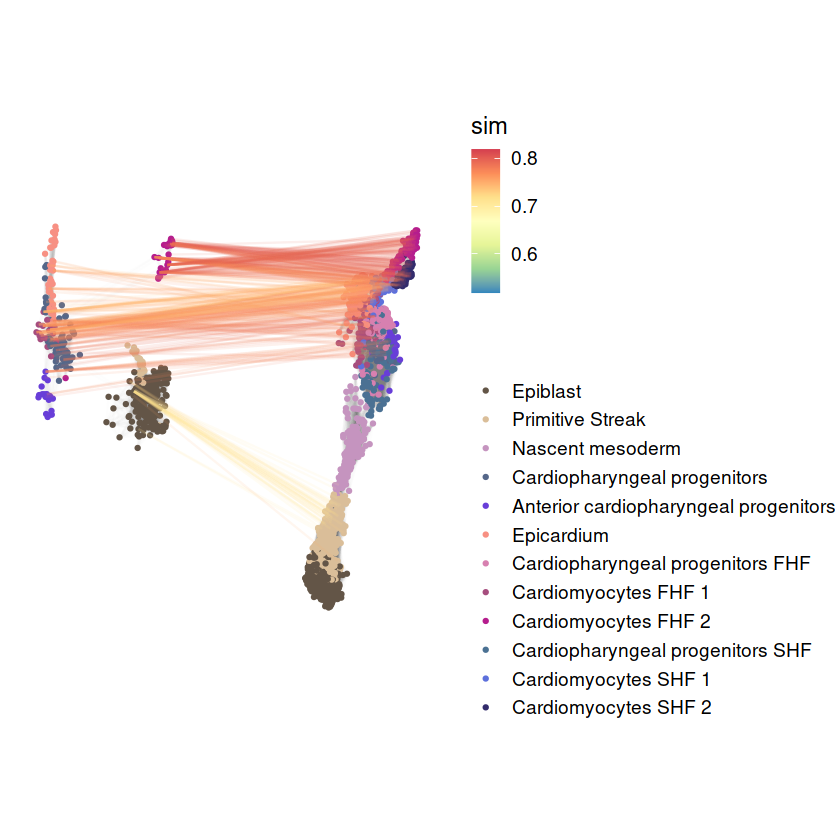

In [175]:
plotNhoodSim(r_milo, m_milo, df_simFilt, "UMAP", "celltype", r_graphFilt, m_graphFilt, 
             offset=c(30,20),reflect.Y=TRUE,line_alpha=0.1,edge_alpha=0.01,
            normalise_sim=FALSE,legend_pos="right")

In [176]:
ggsave("../data-test/compare_neighbourhoods/milo_cardiomyocytes_umap_wedges.pdf",dpi=300,width=15,units="cm")

Saving 15 x 16.9 cm image



### Neural

In [155]:
celltypes <- c("Epiblast", "Neural tube","Dorsal hindbrain progenitors","Dorsal midbrain neurons",
              "Dorsal spinal cord progenitors","Early dorsal forebrain progenitors","Ectoderm",
              "Hindbrain floor plate","Hindbrain neural progenitors", "Late dorsal forebrain progenitors",
              "Midbrain progenitors","Midbrain/Hindbrain boundary","Optic vesicle", "Otic neural progenitors",
              "Spinal cord progenitors","Ventral forebrain progenitors","Ventral hindbrain progenitors",
              "Differentiating neurons","Forebrain/Eye","Hindbrain/Spinal cord", "Floor plate")

r_nhoodFilt <- subsetNhoods(r_milo, "celltype", celltypes)
m_nhoodFilt <- subsetNhoods(m_milo, "celltype", celltypes)

r_graphFilt <- induced_subgraph(r_graph, r_nhoodFilt)
m_graphFilt <- induced_subgraph(m_graph, m_nhoodFilt)

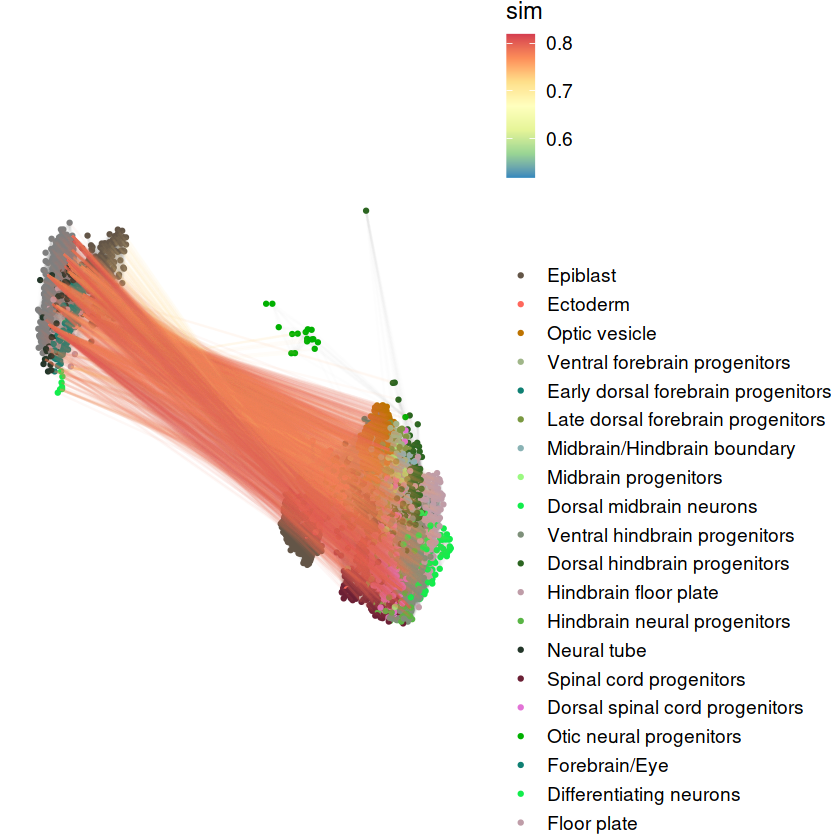

In [335]:
plotNhoodSim(r_milo, m_milo, df_simFilt, "UMAP", "celltype", r_graphFilt, m_graphFilt, 
             offset=c(30,20),reflect.Y=TRUE,line_alpha=0.05,edge_alpha=0.01,
            normalise_sim=FALSE,legend_pos="right")

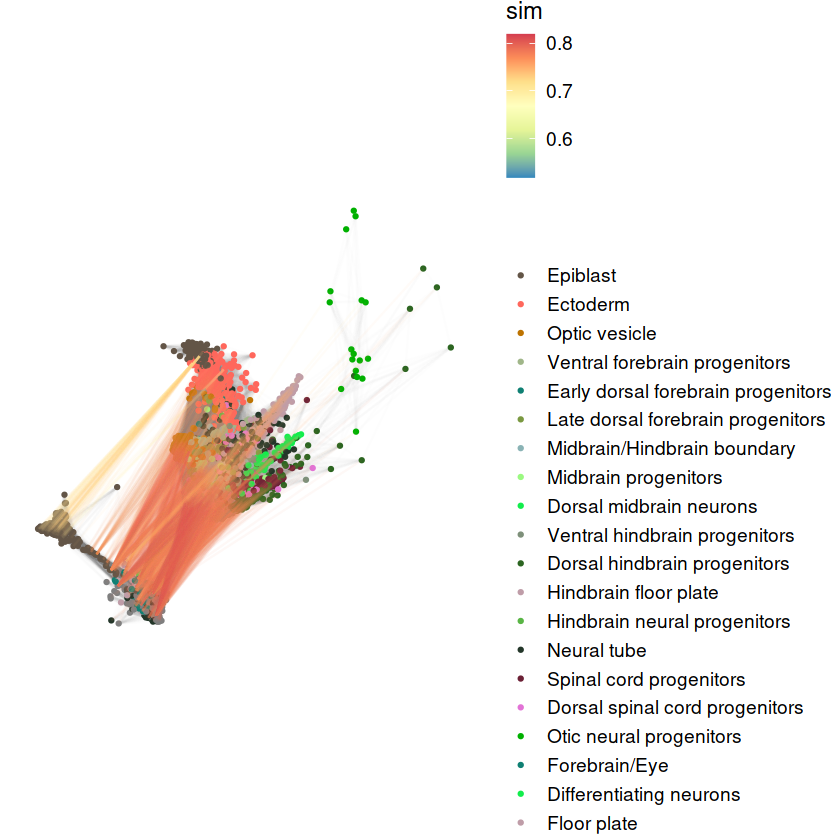

In [156]:
plotNhoodSim(r_milo, m_milo, df_simFilt, "FA", "celltype", r_graphFilt, m_graphFilt, 
             offset=c(1000000,0),reflect.Y=TRUE,line_alpha=0.05,edge_alpha=0.01,
            normalise_sim=FALSE,legend_pos="right")

### ExE ectoderm

In [152]:
celltypes <- c("ExE ectoderm","Syncytiotrophoblast progenitors", "Syncytiotrophoblast","Cytotrophoblast","Amniotic ectoderm", "Unknown","PGC")

r_nhoodFilt <- subsetNhoods(r_milo, "celltype", celltypes)
m_nhoodFilt <- subsetNhoods(m_milo, "celltype", celltypes)

r_graphFilt <- induced_subgraph(r_graph, r_nhoodFilt)
m_graphFilt <- induced_subgraph(m_graph, m_nhoodFilt)

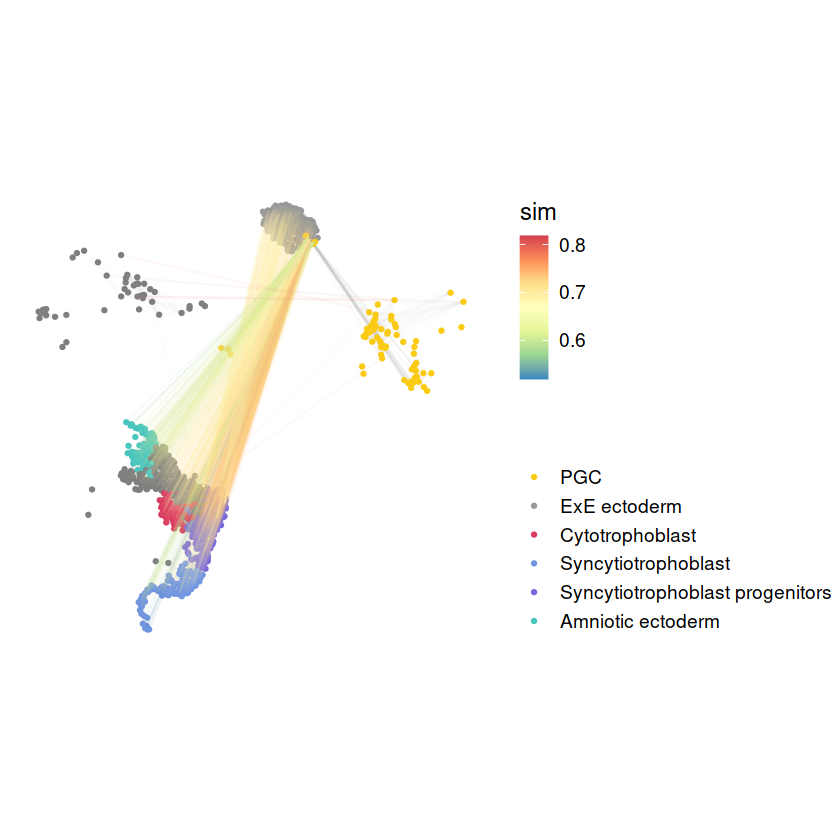

In [153]:
plotNhoodSim(r_milo, m_milo, df_simFilt, "UMAP", "celltype", r_graphFilt, m_graphFilt, 
             offset=c(30,20),reflect.Y=TRUE,line_alpha=0.05,edge_alpha=0.01,
            normalise_sim=FALSE,legend_pos="right")